code M2L02
=====

In [1]:
import numpy as np
from numpy import dot, arange, array, sqrt, eye, diag, ones, tril, var, mean, matmul
from numpy.linalg import norm

Numpy Array Basics
-------------------
http://www.scipy-lectures.org/intro/numpy/array_object.html

Lists
-----
In general, lists are good if you need to add homogeneous or heterogenous items to a container and the number of items is not fixed or unknown beforehand. However, they are not a good choice to manipulate vectors and matrices, as they do not make use of highly optimized liberaries, like BLAS or LAPACK.

In [2]:
l = [[1, 2], [3, 4], [5, 6]]
print(l)
print(len(l))
print(type(l))

[[1, 2], [3, 4], [5, 6]]
3
<class 'list'>


Numpy arrays and matrices
--------------------------
In this Linear Algebra course, we will be using arrays and matrices provided in the Numpy package.

In [3]:
d = array(l) # you may use a list to create a Numpy array.
print(d)
print(len(d))
print(type(d))
print(d.ndim)
print(d.shape)
print(d.size)

[[1 2]
 [3 4]
 [5 6]]
3
<class 'numpy.ndarray'>
2
(3, 2)
6


Numpy array operations
-----------------------

In [4]:
# Transpose
print(d.T)
print(d.T.shape)
print()

# creat a numpy array using arange()
a1 = arange(5.) # The "." is to tell Numpy we want floating numbers.
print(a1)
print()

a2 = arange(1., 5.)
print(a2)
print(a2.ndim)   
print(a2.shape)  
print()

[[1 3 5]
 [2 4 6]]
(2, 3)

[0. 1. 2. 3. 4.]

[1. 2. 3. 4.]
1
(4,)



In [5]:
# The behavior of "1-dimensional" arrays in numpy may not be intuitive
# and hence is not easy to remember.
#
# Using them without clear understanding in their behaviors tend to 
# lead to bugs that are not easy to identiy.
#
# My general rule is to avoid using 1-dimensional arrays when doing
# linear algebra.
#
# Whenever receiving a 1-dimensional array, I prefer to  
# immediately "reahspe" it into a 2-dimensional array.
#
# We can use 2-dimensional arrays to represent matrices,
# column vectors, or row vectors.

a3 = a2.reshape(2,2)
print(a3)
print(a3.shape)
print()

# Even for a column or row vector, we should use a 2-dimensional 
# array.
a4 = a2.reshape(4,1) 
print(a4)
print(a4.shape)
print()

[[1. 2.]
 [3. 4.]]
(2, 2)

[[1.]
 [2.]
 [3.]
 [4.]]
(4, 1)



In [6]:
# Let's create 2 5-dimensional vectors
v = arange(1.,5.).reshape(-1,1)
print(v)
print()

w = arange(10., 14.).reshape(-1,1)
print(w)

[[1.]
 [2.]
 [3.]
 [4.]]

[[10.]
 [11.]
 [12.]
 [13.]]


Code snippet for lecture slides
================

Code snippet M2L02-01
----------------------

In [7]:
# Though the 3 below methods yield the same inner product but one should note that
# their dimensionalities in Python are not the same.

# dot() performs matrix multiplication
d1 = dot(v.T, w)
print(d1)

# * performs element-wise multiplication
d2 = sum(v*w)
print(d2)

# @ performs matrix multiplication, which requires Python 3.5 and Numpy 1.10
d3 = v.T @ w
print(d3)

# matmul() also performs matrix multiplication. 
# If the two operands do not require any broadcasting,
# the output of matmul() should be the same as that of
# dot().
d4 = matmul(v.T, w)
print(d4)

[[120.]]
[120.]
[[120.]]
[[120.]]


Code snippet M2L02-02
----------------------

In [8]:
v = array([[2,2,1]]).T
v_norm = norm(v)
print(v)
print(v_norm)
u = v / v_norm
print(u)
print(norm(u))

[[2]
 [2]
 [1]]
3.0
[[0.66666667]
 [0.66666667]
 [0.33333333]]
1.0


Code snippet M2L02-03
----------------------

In [9]:
M = 3
A = eye(M) + diag(-ones(M-1),-1)
print(A)
print()

x = arange(1.,M+1).reshape(-1,1) ** 2
print(x)
print()

b = A @ x
print(b)

[[ 1.  0.  0.]
 [-1.  1.  0.]
 [ 0. -1.  1.]]

[[1.]
 [4.]
 [9.]]

[[1.]
 [3.]
 [5.]]


Code snippet M2L02-04
----------------------

In [10]:
M = 3
S = tril(ones((M,M)))
print(S)
print()

A = eye(M) + diag(-ones(M-1),-1)
print(A)
print()

x = array([[1.,2,3]]).T
print(x)
print()

print(A @ x)
print()

print(S @ (A @ x))

[[1. 0. 0.]
 [1. 1. 0.]
 [1. 1. 1.]]

[[ 1.  0.  0.]
 [-1.  1.  0.]
 [ 0. -1.  1.]]

[[1.]
 [2.]
 [3.]]

[[1.]
 [1.]
 [1.]]

[[1.]
 [2.]
 [3.]]


Code snippet M2L02-05
----------------------

[[ 1.  0. -1.]
 [-1.  1.  0.]
 [ 0. -1.  1.]]


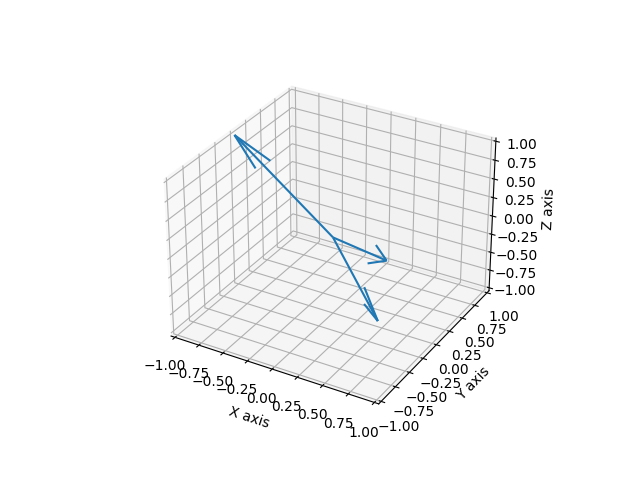

In [11]:
%matplotlib widget
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

o = np.array([0.]*3)

# Make the direction data for the arrows
C = np.array([[1., -1., 0.],[0., 1, -1],[-1., 0., 1.]]).T
print(C)
x = C[0,:]
y = C[1,:]
z = C[2,:]

ax.quiver(o, o, o, x, y, z)

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

plt.show()

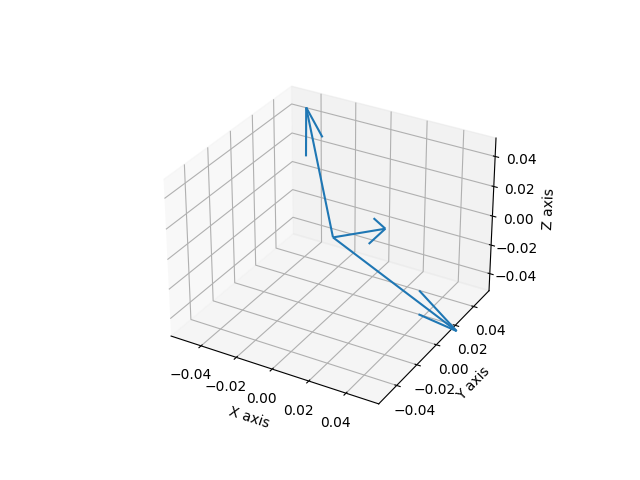

In [12]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

o = np.array([0.]*3)

# Make the direction data for the arrows
C = np.array([[2., -1, 0],[-1, 5, -3],[0, -1, 4]]).T
u = C[0,:]
v = C[1,:]
w = C[2,:]

ax.quiver(o, o, o, u, v, w, length=0.1, normalize=True)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

plt.show()

In [ ]:
# Quiz 2

def birthday_probability(group_size):
    numerator = 365
    denominator = 365
    probability = 1.0

    for i in range(group_size):
        probability *= numerator / denominator
        numerator -= 1

    return 1 - probability

group_size = 1
while True:
    probability = birthday_probability(group_size)
    if probability > 0.5:
        break
    group_size += 1

print(f"The smallest group size with a probability of over 50% is {group_size}") #23
